We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series


In [1]:
import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    return pd.to_datetime(input_, format='%m/%d/%y')

# read data from web
#
def fetch_data(names = ['Confirmed', 'Deaths', 'Recovered']):
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_19-covid-" + name + ".csv")
        df = pd.read_csv(url, index_col=1)
        df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        # extract dates from strings
        dates = string_to_date(df.columns)
        # use those objects as new column labels
        df.columns = dates
        print(f"{name:10}: last data point from {max(dates)}")
        dfs.append(df)
    return dfs



In [2]:
confirmed, deaths, recovered = fetch_data()

Confirmed : last data point from 2020-02-28 00:00:00
Deaths    : last data point from 2020-02-28 00:00:00
Recovered : last data point from 2020-02-28 00:00:00


In [3]:
country = "Germany"

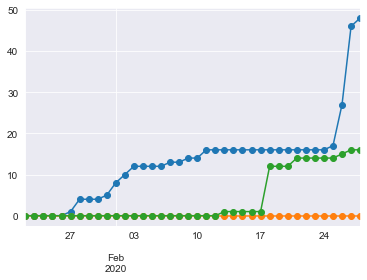

In [4]:
confirmed.loc[country].plot(kind='line', style='o-')
deaths.loc[country].plot(kind='line', style='o-')
recovered.loc[country].plot(kind='line', style='o-')
